In [1]:
import numpy as np 
import nibabel as nib 
import matplotlib.pyplot as plt 
import nilearn.plotting as niplt
%matplotlib inline
import os 
rois=['PostTemp','AntTemp','AngG','IFG','IFGorb','MFG','vmPFC','dmPFC','PMC','HG']
roi_names=['L_'+roi for roi in rois]+['R_'+roi for roi in rois] 

In [2]:
datasets=['black','slumlordreach']
layer_names=['layer_'+str(i)+"_activations" for i in range(0,13)] 
z_reps=['layer_'+str(i)+"_z_representations" for i in range(0,12)]


weight_mats=[[],[],[],[]]
for dataset in datasets:
    fname=fname='/jukebox/griffiths/bert-brains/code/bert-brains/data/'+dataset+'/bert-base-uncased/encoding_weights.npy.npz'

    attention_reps=[dataset+'_bert-base-uncased_syntactic_complexity_L-inf_T-128_D-concat']
    ling_reps=["ling_features"]

    weight_dict=np.load(fname)
    for lst_idx,name_lst in enumerate([layer_names,z_reps,attention_reps,ling_reps]):
        mat=[]
        for name in name_lst:
            mat.append(weight_dict[name].mean(axis=0))
        mat=np.asarray(mat)
        roi_mapping=np.load('/jukebox/griffiths/bert-brains/'+dataset+"_data/Parcel2ROI.npy").astype('int')
        roi_mat=np.zeros((mat.shape[0],20,mat.shape[2]))
        print(mat.shape)
        for roi_num in range(20):
            roi_mat[:,roi_num]=mat[:,np.where(roi_mapping==roi_num+1),:][:,0,:].mean(axis=1)

        weight_mats[lst_idx].append(roi_mat)

layer_weights=np.mean(weight_mats[0],axis=0)
z_weights=np.mean(weight_mats[1],axis=0)
attention_weights=np.mean(weight_mats[2],axis=0)
ling_weights=np.mean(weight_mats[3],axis=0)
    



(13, 1000, 768)
(12, 1000, 768)
(1, 1000, 288)
(1, 1000, 39)
(13, 1000, 768)
(12, 1000, 768)
(1, 1000, 288)
(1, 1000, 39)


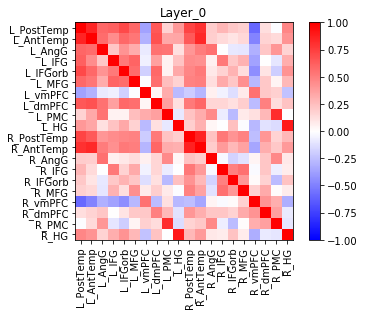

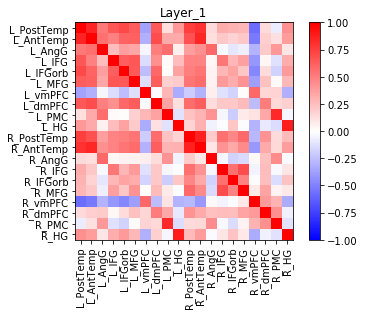

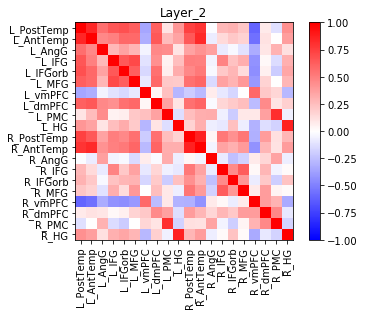

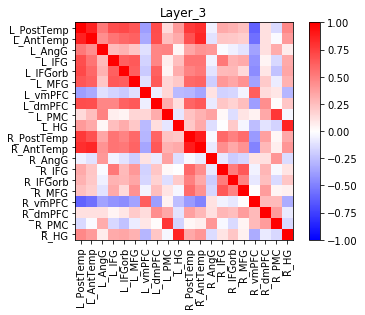

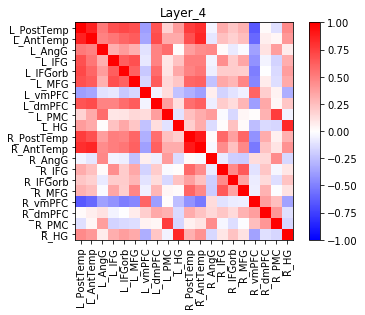

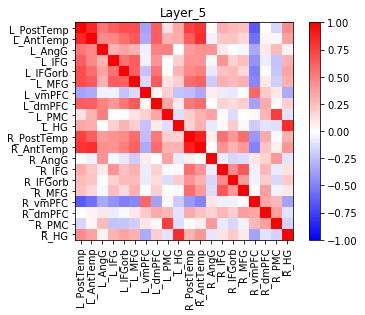

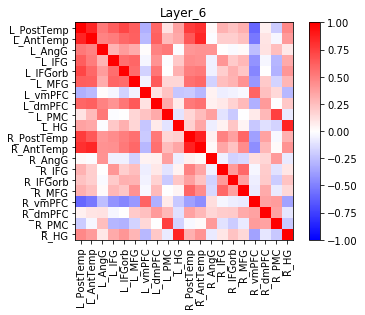

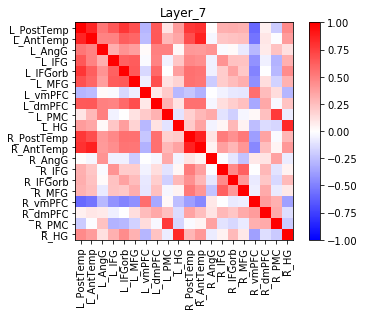

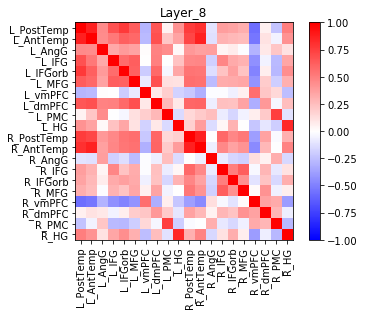

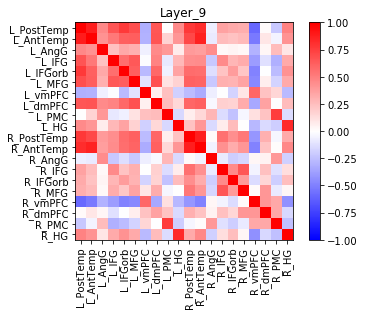

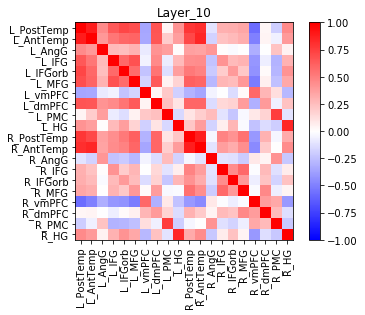

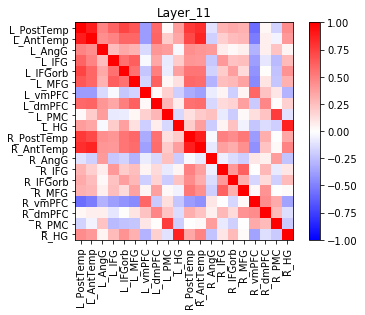

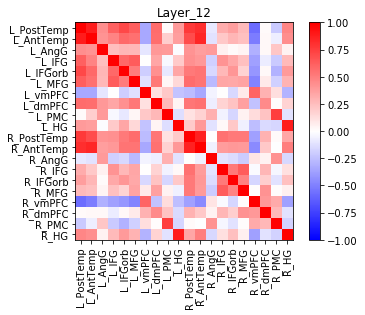

In [7]:
rois=['PostTemp','AntTemp','AngG','IFG','IFGorb','MFG','vmPFC','dmPFC','PMC','HG']
roi_names=['L_'+roi for roi in rois]+['R_'+roi for roi in rois] 
for i in range(13):
    plt.figure()
    plt.title("Layer_"+str(i))
    plt.imshow(np.corrcoef(layer_weights[i]),vmin=-1,vmax=1,cmap='bwr')
    plt.colorbar()
    plt.xticks(list(range(20)),roi_names,rotation=90)
    plt.yticks(list(range(20)),roi_names)
    

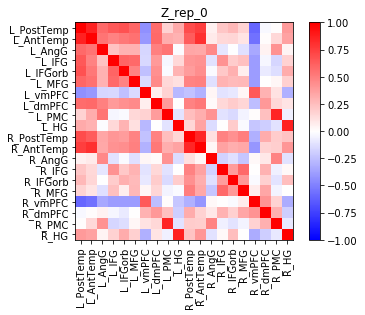

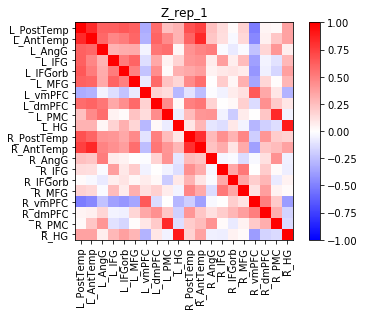

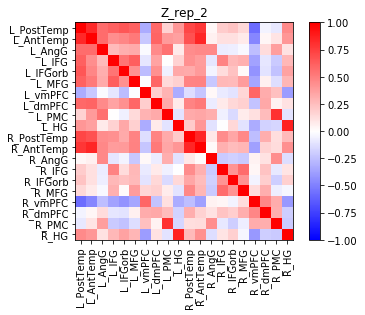

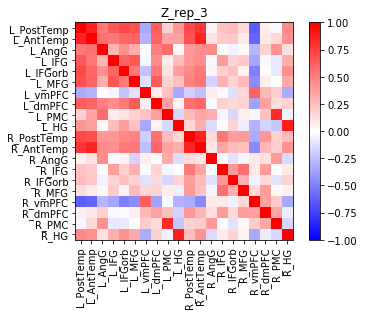

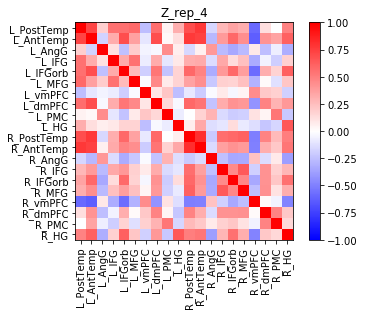

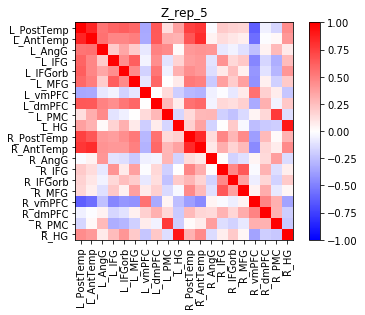

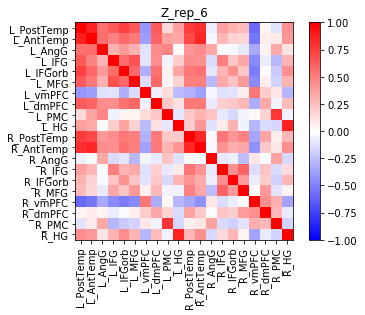

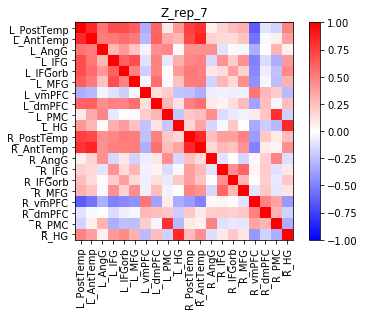

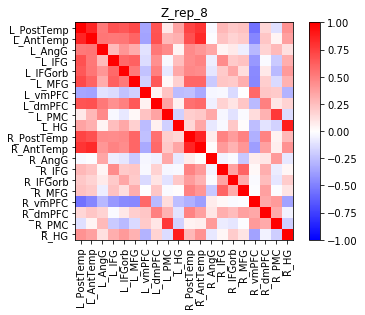

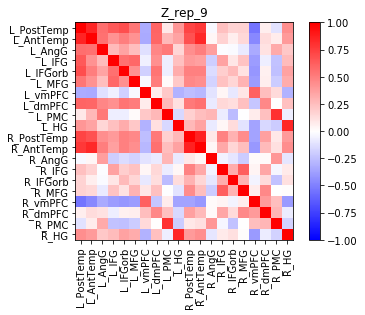

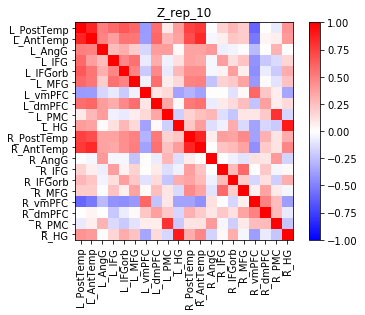

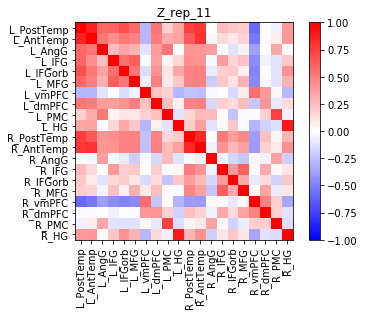

In [8]:
rois=['PostTemp','AntTemp','AngG','IFG','IFGorb','MFG','vmPFC','dmPFC','PMC','HG']
roi_names=['L_'+roi for roi in rois]+['R_'+roi for roi in rois] 
for i in range(12):
    plt.figure()
    plt.title("Z_rep_"+str(i)) 
    plt.imshow(np.corrcoef(z_weights[i]),vmin=-1,vmax=1,cmap='bwr')
    plt.colorbar()
    plt.xticks(list(range(20)),roi_names,rotation=90)
    plt.yticks(list(range(20)),roi_names)
    

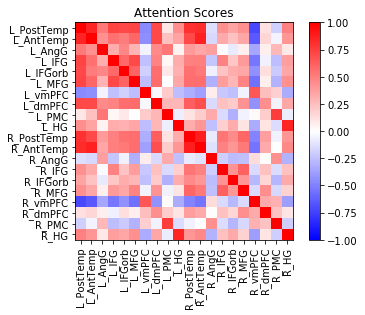

In [5]:
plt.figure()
plt.title("Attention Scores")
plt.imshow(np.corrcoef(attention_weights[0]),vmin=-1,vmax=1,cmap='bwr')
plt.xticks(list(range(20)),roi_names,rotation=90)
plt.yticks(list(range(20)),roi_names)
plt.colorbar()

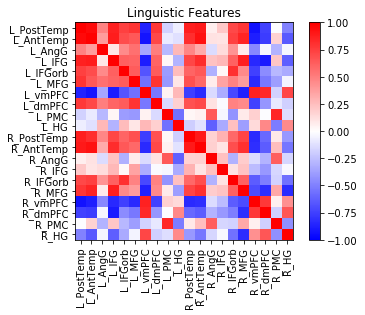

In [6]:

plt.figure()
plt.title("Linguistic Features")
plt.imshow(np.corrcoef(ling_weights[0]),vmin=-1,vmax=1,cmap='bwr')
plt.xticks(list(range(20)),roi_names,rotation=90)
plt.yticks(list(range(20)),roi_names)
plt.colorbar()

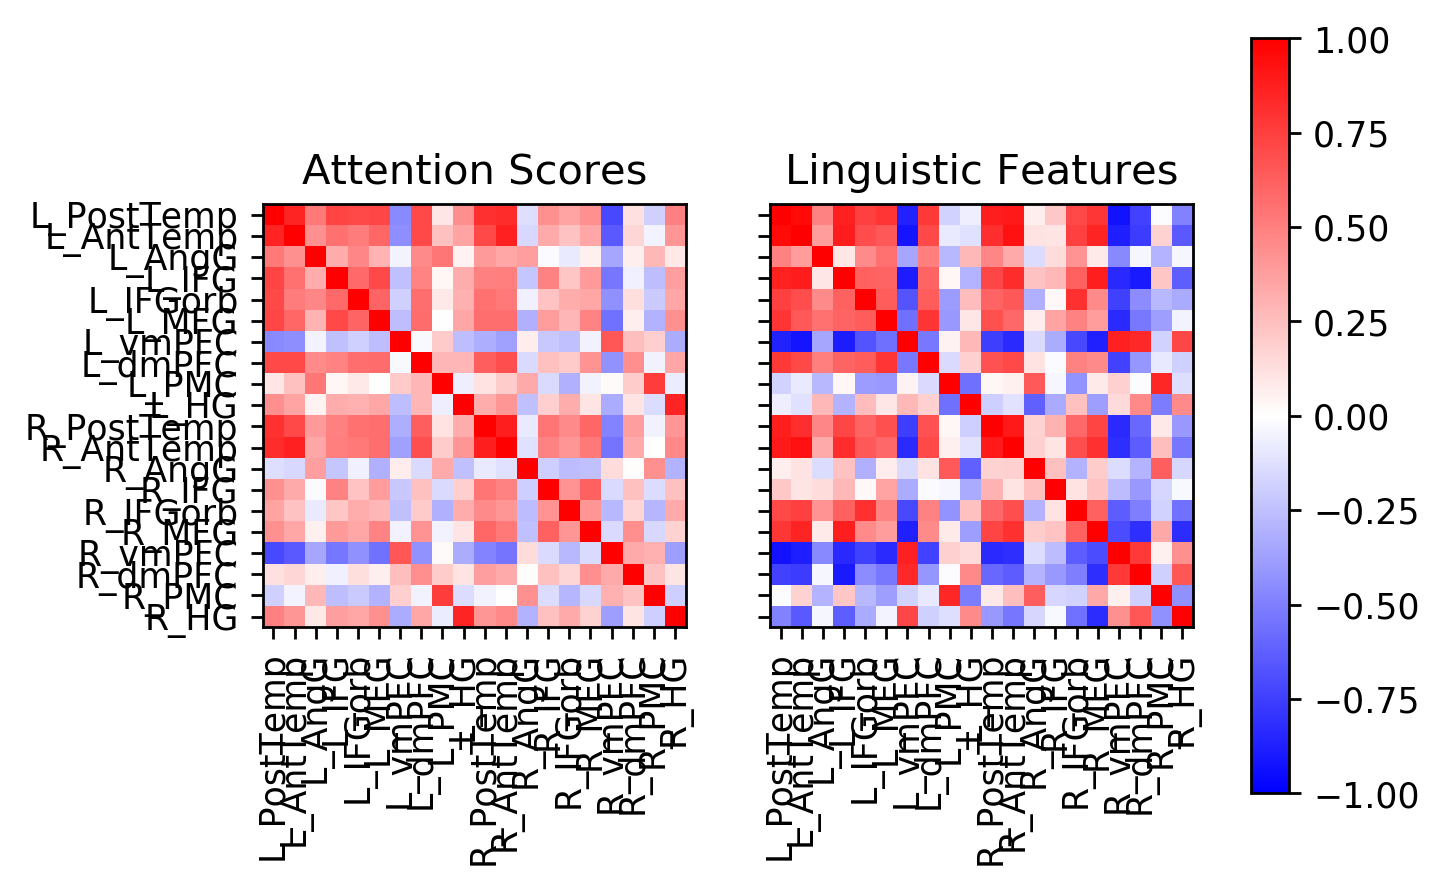

In [23]:
fig,axarr=plt.subplots(1,2,sharex=True,sharey=True,dpi=250)
axarr[0].imshow(np.corrcoef(attention_weights[0]),vmin=-1,vmax=1,cmap='bwr')
axarr[0].set_xticks(list(range(20)))
axarr[0].set_xticklabels(roi_names,rotation=90)
axarr[0].set_yticks(list(range(20)))
axarr[0].set_yticklabels(roi_names)
axarr[0].set_title("Attention Scores")
im=axarr[1].imshow(np.corrcoef(ling_weights[0]),vmin=-1,vmax=1,cmap='bwr')
axarr[1].set_xticks(list(range(20)))
axarr[1].set_xticklabels(roi_names,rotation=90)
axarr[1].set_yticks(list(range(20)))
axarr[1].set_yticklabels(roi_names)
axarr[1].set_title("Linguistic Features")
fig.colorbar(im,ax=axarr)

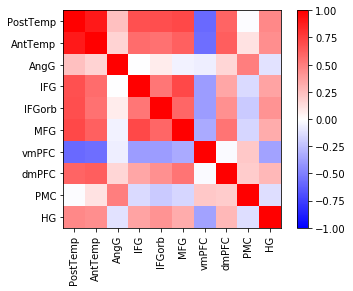

In [18]:
mat=np.mean(np.asarray([attention_weights[0,:10,:],attention_weights[0,10:,:]]),axis=0)
plt.imshow(np.corrcoef(mat),vmin=-1,vmax=1,cmap='bwr')
plt.colorbar()
plt.xticks(list(range(10)),rois,rotation=90)
plt.yticks(list(range(10)),rois)
plt.savefig("plots/fig4_1/attention_roi_rdm.svg",format='svg')

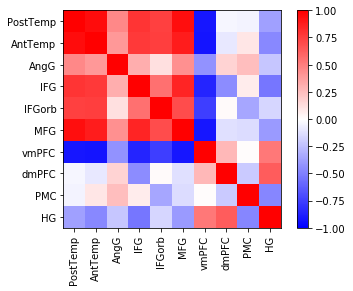

In [17]:
mat=np.mean(np.asarray([ling_weights[0,:10,:],ling_weights[0,10:,:]]),axis=0)
plt.imshow(np.corrcoef(mat),vmin=-1,vmax=1,cmap='bwr')
plt.colorbar()
plt.xticks(list(range(10)),rois,rotation=90)
plt.yticks(list(range(10)),rois)
plt.savefig("plots/fig4_1/ling_roi_rdm.svg",format='svg')

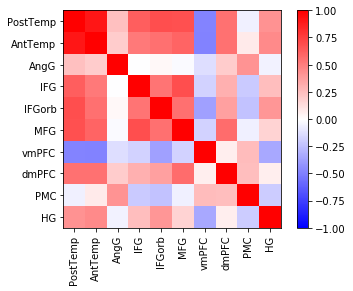

In [20]:
mat=np.mean(np.asarray([layer_weights[9,:10,:],layer_weights[9,10:,:]]),axis=0)
plt.imshow(np.corrcoef(mat),vmin=-1,vmax=1,cmap='bwr')
plt.colorbar()
plt.xticks(list(range(10)),rois,rotation=90)
plt.yticks(list(range(10)),rois)
plt.savefig("plots/fig4_1/layer10_roi_rdm.svg",format='svg')

In [45]:
raw_attention_features=np.load('/jukebox/griffiths/bert-brains/code/bert-brains/data/black/bert-base-uncased/syntactic_analyses/black_bert-base-uncased_syntactic_complexity_L-inf_T-128_D-concat.npy',allow_pickle=True)

In [46]:
data_dir='/jukebox/griffiths/bert-brains/black_data/'
sub='sub-314'
def get_rep(layer_dir):
    nii=nib.load(data_dir+sub+".nii.gz")
    data_prefix='/jukebox/griffiths/bert-brains/code/bert-brains/data/black/'
    phoneme_counts=np.load(data_prefix+"black_phoneme_counts.npy").reshape((-1,1))
    word_counts=np.load(data_prefix+"black_word_counts.npy").reshape((-1,1))
    phoneme_vectors=np.load(data_prefix+"black_phoneme_vectors.npy")
    #embedding_layer=np.load('/jukebox/griffiths/bert-brains/code/bert-brains/data/black/bert-base-uncased/raw_embeddings/black_bert-base-uncased_layer_12_activations.npy')
    primary_features=np.hstack([phoneme_counts,phoneme_vectors,word_counts])

    load_features=np.load(layer_dir,allow_pickle=True)
    raw_features=[]
    raw_primary_features=[]
    for i in range(load_features.shape[0]):
        if raw_attention_features[i] is not None and len(raw_attention_features[i])>0:
            raw_primary_features.append(primary_features[i])
            if 'semantic_composition' in layer_dir:
                raw_features.append(load_features[i][0])
            else:
                raw_features.append(load_features[i])

    raw_features=np.vstack(raw_features)
    raw_primary_features=np.vstack(raw_primary_features)
    begin_delay=534-raw_features.shape[0]



    raw_features=np.hstack([raw_features,raw_primary_features])
    num_primary=raw_primary_features.shape[1]

    shifted=[]
    is_primary_lst=[]
    delays=[0]
    for d in delays:
        arr=np.zeros((raw_features.shape[0]+5,raw_features.shape[1]))
        arr_prim=np.zeros(arr.shape)
        arr_prim[:,-num_primary:]=1
        arr[d:raw_features.shape[0]+d,:]=raw_features
        is_primary_lst.append(arr_prim)
        shifted.append(arr)
    features=np.hstack(shifted)
    is_primary=np.hstack(is_primary_lst)

    load_data=nii.get_fdata()[:,:,:,8:-8]
    raw_data=load_data[:,:,:,begin_delay:]

    features=features[10:-10,:]
    raw_data=raw_data[:,:,:,10:-10]
    is_primary=is_primary[10:-10,:]



    trailing=features.shape[0]-raw_data.shape[3]
    features=features[:-trailing]
    is_primary=is_primary[:-trailing] 
    return features 


In [47]:
attention_rep=get_rep('/jukebox/griffiths/bert-brains/code/bert-brains/data/black/bert-base-uncased/syntactic_analyses/black_bert-base-uncased_syntactic_complexity_L-inf_T-128_D-concat.npy')

layer_rep=get_rep('/jukebox/griffiths/bert-brains/code/bert-brains/data/black/bert-base-uncased/raw_embeddings/black_bert-base-uncased_layer_9_activations.npy')

ling_rep=get_rep('/jukebox/griffiths/bert-brains/code/bert-brains/data/black/ling_features.npy')

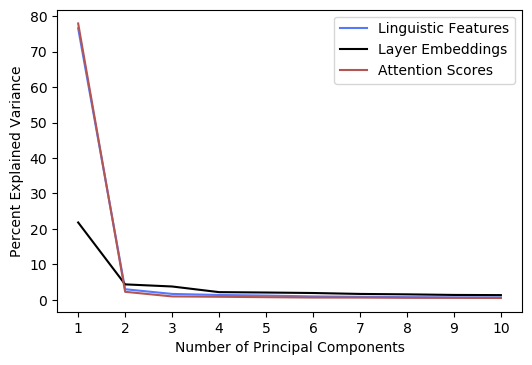

In [69]:
from sklearn.decomposition import PCA 
rep_names=['Linguistic Features','Layer Embeddings','Attention Scores']
reps=[ling_rep,layer_rep,attention_rep]
plt.figure(dpi=100)
colors=['#5578ff','#000000','#B35653']
for i in range(3):
    rep=reps[i]
    name=rep_names[i]
    pca=PCA(n_components=min(rep.shape[0],rep.shape[1]))
    pca.fit(rep)
    explained_variance=pca.explained_variance_ratio_*100
    line=np.zeros((475,))
    line[:len(explained_variance)]=explained_variance
    plt.plot(list(range(10)),line[:10],color=colors[i])
    plt.xticks(list(range(10)),list(range(1,11)))
plt.legend(rep_names)
plt.xlabel("Number of Principal Components")
plt.ylabel("Percent Explained Variance")
plt.savefig('plots/fig4_1/screeplot.svg',format='svg')

/usr/people/sreejank/anaconda3/envs/fmri/lib/python3.7/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/people/sreejank/anaconda3/envs/fmri/lib/python3.7/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


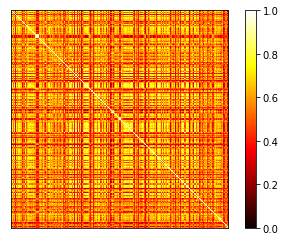

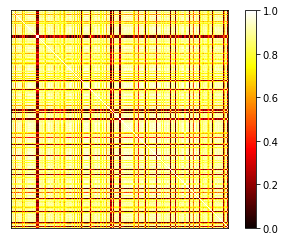

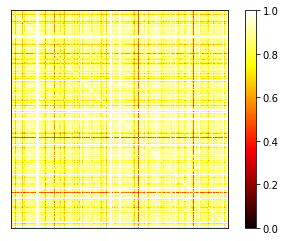

In [79]:
plt.imshow(np.corrcoef(layer_rep),cmap='hot',vmin=0,vmax=1)
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.savefig('plots/fig4_1/layer_rsm.svg',format='svg')
plt.figure()
plt.imshow(np.corrcoef(attention_rep),cmap='hot',vmin=0,vmax=1)
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.savefig('plots/fig4_1/attention_rsm.svg',format='svg')
plt.figure()
plt.xticks([])
plt.yticks([])
plt.imshow(np.corrcoef(ling_rep),cmap='hot',vmin=0,vmax=1)
plt.savefig('plots/fig4_1/ling_rsm.svg',format='svg')
plt.colorbar()


In [85]:
rdm[np.triu(rdm,k=1).astype('bool')]

array([0.37850756, 0.30884757, 0.3371635 , ..., 0.63275177, 0.76687542,
       0.62210557])

/usr/people/sreejank/anaconda3/envs/fmri/lib/python3.7/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/people/sreejank/anaconda3/envs/fmri/lib/python3.7/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


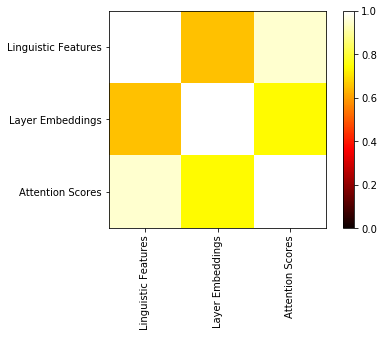

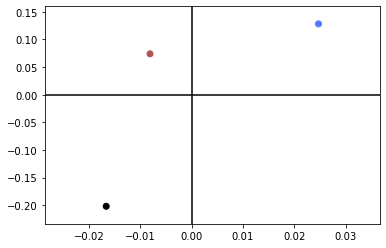

In [124]:
corrs=[]
for rep in reps:
    rdm=np.corrcoef(rep)
    corrs.append(rdm[np.triu(rdm,k=1).astype('bool')]) 
corrs=np.asarray(corrs)
corrs[np.isnan(corrs)]=0.0
plt.figure()
plt.imshow(np.corrcoef(corrs),cmap='hot',vmin=0,vmax=1)
plt.xticks([0,1,2],rep_names,rotation=90)
plt.yticks([0,1,2],rep_names)
plt.colorbar()
distance_mat=1-np.corrcoef(corrs)
plt.savefig('plots/fig4_1/rsa_3.svg',format='svg')
from sklearn.manifold import MDS 
mds=MDS(n_components=2,dissimilarity='precomputed')
coords=mds.fit_transform(distance_mat)
plt.figure()
plt.scatter(coords[:,0],coords[:,1],c=colors)
plt.axvline(x=0,color='black')
plt.axhline(y=0,color='black')
plt.savefig('plots/fig4_1/mds_plot.svg',format='svg')

In [92]:
corrs

array([[       nan,        nan,        nan, ..., 0.82038899, 0.89796946,
        0.86151315],
       [0.37850756, 0.30884757, 0.3371635 , ..., 0.63275177, 0.76687542,
        0.62210557],
       [0.08447719, 0.0914617 , 0.12068172, ..., 0.84672554, 0.92274584,
        0.87138774]])